In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import seaborn as sns

In [2]:
data_raw = pd.read_csv("/Users/iainquinn/Crystalisation Internship/Data/DataRaw.csv")

In [3]:
data_raw.head()

,Source,Molecule,SMILES,Method,solvent,Solvent 1 mass fraction,Solvent 2,Solvent 2 mass fraction,Antisolvent,Antisolvent mass fraction,...,Solute concentration (mass solute/mass solvent mixture),Solubility (mass solute/mass solvent mixture),Supersaturation,induction_time,Standard Deviation (s),Growth Rate (m/s),Standard Deviation (m/s),Units for concentration in solution,Comments,Unnamed: 23
0,Beckmann_1999,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,NaN,NaN,3.892554,2.935094,NaN,NaN,NaN,NaN,"Temperature, vessel & working volumeand agitat...",NaN
1,Beckmann_1999,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,NaN,NaN,3.273095,4.000632,NaN,NaN,NaN,NaN,NaN,NaN
2,Beckmann_1999,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,NaN,NaN,3.538031,4.001133,NaN,NaN,NaN,NaN,NaN,NaN
3,Beckmann_1999,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,NaN,NaN,2.706836,3.998877,NaN,NaN,NaN,NaN,NaN,NaN
4,Beckmann_1999,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,NaN,NaN,1.989765,5.947128,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 24 columns):
Source                                                     44 non-null object
Molecule                                                   1531 non-null object
SMILES                                                     1459 non-null object
Method                                                     1531 non-null object
Solvent 1                                                  1240 non-null object
Solvent 1 mass fraction                                    209 non-null float64
Solvent 2                                                  420 non-null object
Solvent 2 mass fraction                                    95 non-null float64
Antisolvent                                                488 non-null object
Antisolvent mass fraction                                  23 non-null float64
Vessel Volume (mL)                                         1316 non-null float64
Operating  Volume 

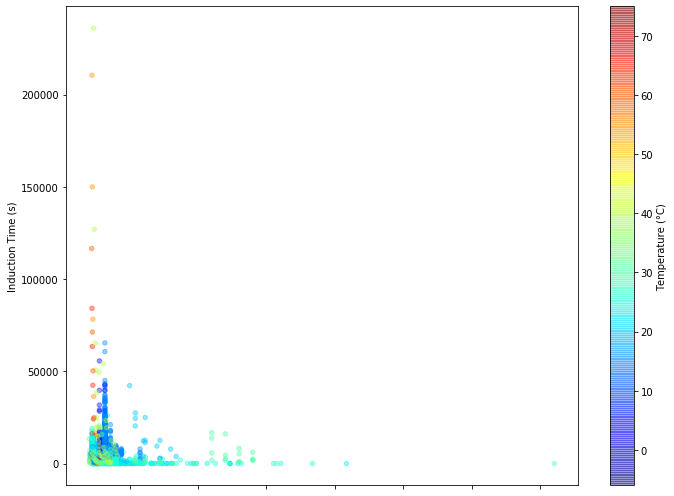

In [10]:
data_raw.plot(kind= 'scatter', x="Supersaturation", y = "induction_time",c="Temperature (°C)", colorbar=True, alpha = 0.4, cmap=plt.get_cmap("jet"), figsize=(10,7))
plt.ylabel("Induction Time (s)")
plt.xlabel("Supersaturation Ratio")
plt.tight_layout()

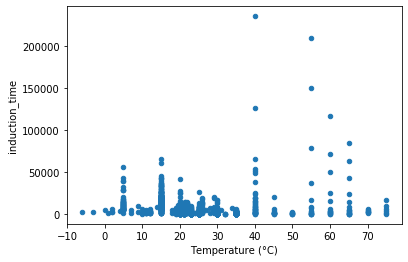

In [11]:
data_raw.plot(kind= 'scatter', y="induction_time", x = "Temperature (°C)")

In [12]:
corr_matrix= data_raw.corr()
corr_matrix["induction_time"].sort_values(ascending=False)

induction_time                                             1.000000e+00
Standard Deviation (s)                                     9.193096e-01
Solvent 2 mass fraction                                    3.278113e-01
Operating  Volume (mL)                                     8.023938e-02
Vessel Volume (mL)                                         7.310361e-02
Solubility (mass solute/mass solvent mixture)              1.938572e-02
Temperature (°C)                                           7.687868e-03
Antisolvent mass fraction                                 -9.465234e-18
Agitation rate (RPM)                                      -8.821857e-02
Supersaturation                                           -9.281825e-02
Growth Rate (m/s)                                         -9.308789e-02
Standard Deviation (m/s)                                  -1.367757e-01
Solvent 1 mass fraction                                   -2.157743e-01
Solute concentration (mass solute/mass solvent mixture)   -2.772

In [13]:
data_raw['ln_induction_time'] = np.log(data_raw['induction_time'])
data_raw['ln_supersaturation'] = np.log(data_raw['Supersaturation'])
data_raw['1/supersaturation']= 1/(data_raw['Supersaturation'])



In [14]:
data_raw.head()

,Source,Molecule,SMILES,Method,Solvent 1,Solvent 1 mass fraction,Solvent 2,Solvent 2 mass fraction,Antisolvent,Antisolvent mass fraction,...,induction_time,Standard Deviation (s),Growth Rate (m/s),Standard Deviation (m/s),Units for concentration in solution,Comments,Unnamed: 23,ln_induction_time,ln_supersaturation,1/supersaturation
0,Beckmann_1999,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,2.935094,NaN,NaN,NaN,NaN,"Temperature, vessel & working volumeand agitat...",NaN,1.076740,1.359065,0.256901
1,NaN,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,4.000632,NaN,NaN,NaN,NaN,NaN,NaN,1.386452,1.185736,0.305521
2,NaN,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,4.001133,NaN,NaN,NaN,NaN,NaN,NaN,1.386578,1.263570,0.282643
3,NaN,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,3.998877,NaN,NaN,NaN,NaN,NaN,NaN,1.386014,0.995781,0.369435
4,NaN,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,5.947128,NaN,NaN,NaN,NaN,NaN,NaN,1.782908,0.688017,0.502572


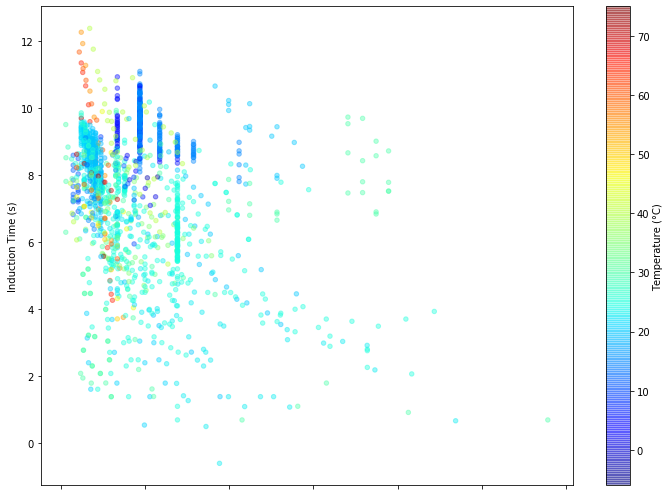

In [15]:
data_raw.plot(kind= 'scatter', x="ln_supersaturation", y = "ln_induction_time",c="Temperature (°C)", colorbar=True, alpha = 0.4, cmap=plt.get_cmap("jet"), figsize=(10,7))
plt.ylabel("Induction Time (s)")
plt.xlabel("Supersaturation Ratio")
plt.tight_layout()

In [16]:
Y = np.c_[data_raw["ln_induction_time"]]
X = np.c_[data_raw["1/supersaturation"]]
model = sklearn.linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

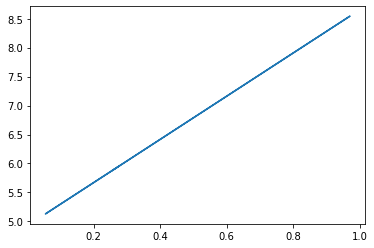

In [17]:
prediction=model.predict(X)
plt.plot(X, prediction)

In [18]:
from sklearn.metrics import r2_score
r2_score(Y, prediction)

0.09185096182147567

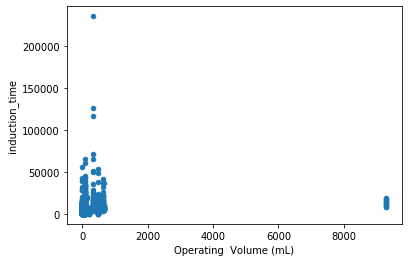

In [19]:
data_raw.plot(kind= 'scatter', x="Operating  Volume (mL)", y = "induction_time")

In [20]:
data_raw["Method"].value_counts()

Cooling        844
Antisolvent    687
Name: Method, dtype: int64

In [1]:
g=sns.scatterplot(y=data_raw['ln_induction_time'], x=data_raw['ln_supersaturation'], hue=data_raw['Molecule'])
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)



NameError: name 'sns' is not defined

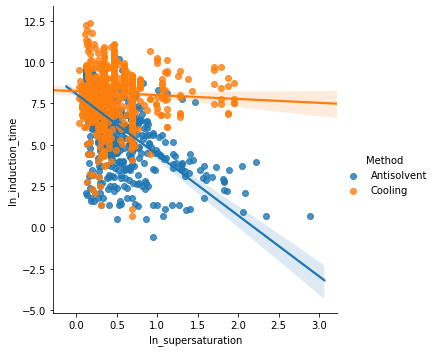

In [22]:
sns.lmplot(y="ln_induction_time", x="ln_supersaturation", hue="Method", data=data_raw)

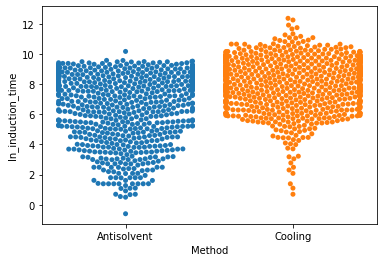

In [23]:
sns.swarmplot(x="Method", y="ln_induction_time", data=data_raw)

In [24]:
anti = data_raw.loc[data_raw.Molecule == 'Paracetamol']

In [25]:
anti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 521 to 890
Data columns (total 27 columns):
Source                                                     7 non-null object
Molecule                                                   370 non-null object
SMILES                                                     370 non-null object
Method                                                     370 non-null object
Solvent 1                                                  79 non-null object
Solvent 1 mass fraction                                    23 non-null float64
Solvent 2                                                  0 non-null object
Solvent 2 mass fraction                                    0 non-null float64
Antisolvent                                                319 non-null object
Antisolvent mass fraction                                  0 non-null float64
Vessel Volume (mL)                                         360 non-null float64
Operating  Volume (mL)        

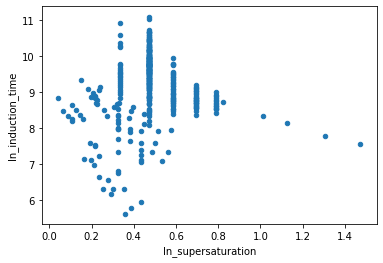

In [26]:
anti.plot(kind='scatter', y="ln_induction_time", x="ln_supersaturation")

In [28]:
Y = np.c_[anti["ln_induction_time"]]
X = np.c_[anti["ln_supersaturation"]]
model = sklearn.linear_model.LinearRegression()
model.fit(X, Y)
prediction=model.predict(X)
from sklearn.metrics import r2_score
r2_score(Y, prediction)
print(model.coef_)
print(model.intercept_)

[[0.39930761]]
[8.93151604]


In [4]:
plot=sns.lmplot(y="ln_induction_time", x="ln_
                supersaturation", data=anti).set(title="Ln(t_ind) Vs 1/S")

SyntaxError: EOL while scanning string literal (<ipython-input-4-b39f547c88ec>, line 1)

In [5]:
plot.savefig("anti_3.png")

NameError: name 'plot' is not defined